### Analysing monthly closing price

In [31]:
df['date']=pd.to_datetime(df['date'])

In [32]:
df.set_index('date',inplace=True)

In [33]:
df.dtypes

open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
1day % return    float64
dtype: object

<AxesSubplot:xlabel='date'>

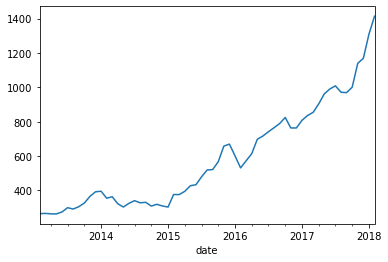

In [34]:
df['close'].resample('M').mean().plot()

### Analysing yearly closing price

<AxesSubplot:xlabel='date'>

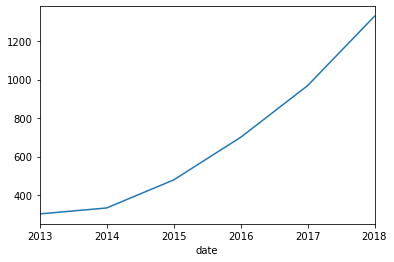

In [35]:
df['close'].resample('Y').mean().plot()

### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,IBM) are correlated or not


In [36]:
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'IBM_data.csv', 'AMZN_data.csv']

In [37]:
def read_data(path,filename):
    return pd.read_csv(path+"/"+filename)

In [38]:
path='individual_stocks_5yr'

In [39]:
aapl=read_data(path,company_list[0])

In [40]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [41]:
goog=read_data(path,company_list[1])

In [42]:
ibm=read_data(path,company_list[2])

In [43]:
amzn=read_data(path,company_list[3])

In [44]:
### create a blank dataframe in which I can store closing price of each tech
close=pd.DataFrame()


In [45]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['ibm']=ibm['close']

In [46]:
close.head()

,aapl,goog,amzn,ibm
0,67.8542,558.46,261.95,201.68
1,68.5614,559.99,257.21,200.16
2,66.8428,556.97,258.70,200.04
3,66.7156,567.16,269.47,200.09
4,66.6556,567.00,269.24,199.65


#### Multi-variate Analysis

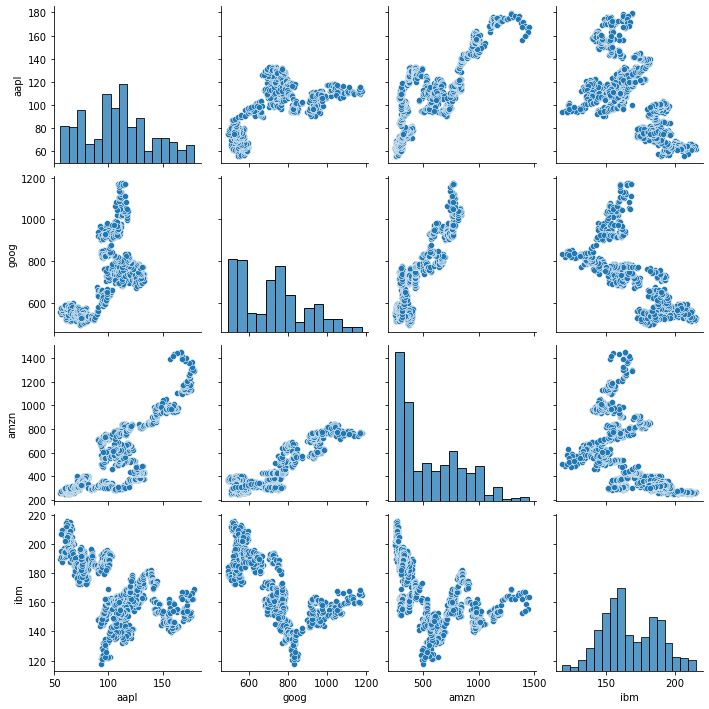

In [47]:
sns.pairplot(data=close)

### co-relation plot for stock prices

<AxesSubplot:>

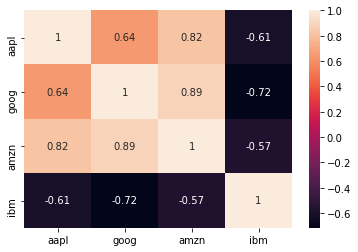

In [48]:
sns.heatmap(close.corr(),annot=True)

    Closing price of Google and amazon are well correlated
     and Closing price of Amazon and apple have a co-relation of 0.96

### Analyse Daily return of each stock & how they are co-related


In [49]:
data=pd.DataFrame()

In [50]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((ibm['close']-ibm['open'])/ibm['close'])*100

In [51]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.847878
1,0.714688,-0.216075,-2.328836,-0.409672
2,-2.481344,-1.781065,-0.189409,0.014997
3,-0.042869,1.489879,2.946525,-0.279874
4,0.443624,0.334039,0.694548,-0.040070


<AxesSubplot:>

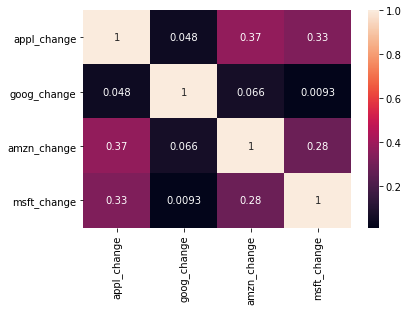

In [52]:
sns.heatmap(data.corr(),annot=True)

    We can see that Amazon and google have good correlation on daily returns